# Gym Retro

[Gym Retro](https://blog.openai.com/gym-retro/) is a platform for [reinforcement learning](https://en.wikipedia.org/wiki/Reinforcement_learning) research on games. It turns out that old games are a perfect fit for benchmarking and improving RL agents in a simulated environment. After two years after the beta release of [Gym](https://blog.openai.com/openai-gym-beta/), OpenAI released an extension of this amazing software by adding more game environments. The goal of the new platform is to study the ability of the agents to *generalize* between games with similar concepts but different appearances.

![test](https://mikelyons.org/images/retro_colab/heavy_tile.png)

## Gym Retro Contest - Sonic The Hedgehog™

[In this contest](https://blog.openai.com/retro-contest/), participants try to create the best agent for playing custom levels of the Sonic games — without having access to those levels during development. You can find more detail in this [page](https://contest.openai.com/details).

As mentioned in the contest's description this is a Transfer Learning task, which means that you are free to train your agent however you'd like, however, the OpenAI Team recommend using Sonic 1, 2, and 3 & Knuckles, which are available on Steam here:

- [Sonic The Hedgehog](http://store.steampowered.com/app/71113/Sonic_The_Hedgehog/)
- [Sonic The Hedgehog 2](http://store.steampowered.com/app/71163/Sonic_The_Hedgehog_2/)
- [Sonic 3 & Knuckles](http://store.steampowered.com/app/71162/Sonic_3___Knuckles/)

In this notebook, we will show you how to use set up Gym-Retro on FloydHub.

We will:

- Install Gym-Retro
- Import and load the ROMs of the games
- Use random-policy for a couple of steps
- Visualize the agents

### Instructions

- To execute a code cell, click on the cell and press `Shift + Enter` (shortcut for Run).
- To learn more about Workspaces, check out the [Getting Started Notebook](./get_started_workspace.ipynb).
- **Tip**: *Feel free to use this Notebook as a starting point for your own super awesome Reinforcement Learning task*.

Now, let's get started! 🚀

## Initial Setup
Let's start by importing some installing extra packages from running `gym-retro`

In [1]:
! bash install.sh

Installing deps...
Get:1 http://storage.googleapis.com/bazel-apt stable InRelease [2450 B]
Get:2 http://security.ubuntu.com/ubuntu xenial-security InRelease [107 kB]
Get:3 http://ppa.launchpad.net/git-core/ppa/ubuntu xenial InRelease [17.5 kB]
Get:4 http://archive.ubuntu.com/ubuntu xenial InRelease [247 kB]
Ign:1 http://storage.googleapis.com/bazel-apt stable InRelease
Get:5 http://storage.googleapis.com/bazel-apt stable/jdk1.8 amd64 Packages [615 B]
Get:6 https://deb.nodesource.com/node_8.x xenial InRelease [4646 B]
Get:7 http://security.ubuntu.com/ubuntu xenial-security/universe Sources [81.2 kB]
Get:8 https://deb.nodesource.com/node_8.x xenial/main Sources [761 B]
Get:9 https://deb.nodesource.com/node_8.x xenial/main amd64 Packages [1007 B]
Get:10 http://security.ubuntu.com/ubuntu xenial-security/main amd64 Packages [652 kB]
Get:11 http://ppa.launchpad.net/git-core/ppa/ubuntu xenial/main amd64 Packages [3492 B]
Get:12 https://packagecloud.io/github/git-lfs/ubuntu xenial InRelease [2

Now we can import the dependencies.

In [2]:
%load_ext autoreload
%autoreload 2

import retro
from support import save_frames_as_gif, install_games_from_rom_dir, download_and_unzip_rom_archive_from_url

## Import and load external ROMs

In the next Code Cells we will show how to load an external ROM from a dataset or downloaded from the internet.

##### - Loading ROMs from Dataset

In [6]:
DS_PATH = '' # edit with your path/to/rom

install_games_from_rom_dir(DS_PATH)

Importing SonicAndKnuckles3-Genesis
Importing SonicTheHedgehog-Genesis
Importing SonicTheHedgehog2-Genesis
Imported 3 games


##### - Loading ROMs from URL

In [7]:
URL = '' # edit with your https://URL/of/your/ROM/zipfile

download_and_unzip_rom_archive_from_url(URL, 'roms/')
install_games_from_rom_dir('roms/')

Directory roms/ didn't exist, making


3694592it [00:01, 2019826.74it/s]                             
100%|██████████| 5767168/5767168 [00:00<00:00, 82681915.42it/s]


Importing SonicAndKnuckles3-Genesis
Importing SonicTheHedgehog-Genesis
Importing SonicTheHedgehog2-Genesis
Imported 3 games


Let's check if the games were correctly imported by listing the available environments

In [8]:
sorted(retro.list_games())

['Adventure-Atari2600',
 'AirRaid-Atari2600',
 'Airstriker-Genesis',
 'Alien-Atari2600',
 'AlienSoldier-Genesis',
 'AlteredBeast-Genesis',
 'Amidar-Atari2600',
 'Assault-Atari2600',
 'Asterix-Atari2600',
 'Asteroids-Atari2600',
 'Atlantis-Atari2600',
 'BankHeist-Atari2600',
 'BattleZone-Atari2600',
 'BeamRider-Atari2600',
 'Berzerk-Atari2600',
 'BioHazardBattle-Genesis',
 'Bowling-Atari2600',
 'Boxing-Atari2600',
 'Breakout-Atari2600',
 'Carnival-Atari2600',
 'Centipede-Atari2600',
 'ChopperCommand-Atari2600',
 'Columns-Genesis',
 'ColumnsIII-Genesis',
 'ComixZone-Genesis',
 'CrackDown-Genesis',
 'CrazyClimber-Atari2600',
 'Defender-Atari2600',
 'DemonAttack-Atari2600',
 'DoubleDunk-Atari2600',
 'DrRobotniksMeanBeanMachine-Genesis',
 'DynamiteHeaddy-Genesis',
 'Enduro-Atari2600',
 'FatalLabyrinth-Genesis',
 'FishingDerby-Atari2600',
 'Flicky-Genesis',
 'Freeway-Atari2600',
 'Frostbite-Atari2600',
 'GainGround-Genesis',
 'GalaxyForceII-Genesis',
 'GoldenAxe-Genesis',
 'GoldenAxeIII-Gene

## A random walk

In the next steps will load the `MetropolisZone` level from **SonicTheHedgehog2** game and make a random walk in the environment for 300 steps.

In [9]:
# Loading the level
env = retro.make(
    game='SonicTheHedgehog2-Genesis',  # Game
    state='MetropolisZone.Act1',  # Level
    record=True)  # Record the Run

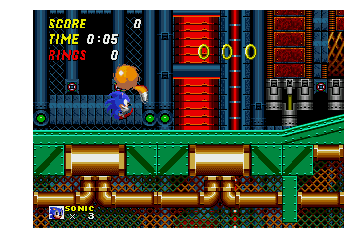

In [11]:
# Frame list collector
frames = []
STEPS = 300

observation = env.reset()
for i in range(STEPS): # Take random actions for # STEPS
    random_action = env.action_space.sample()
    observation, reward, done, info = env.step( random_action )
    frames.append(observation) # collecting observation
    
    if done: # If the env is done make sure you reset it
        observation = env.reset()
        frames.append(observation)
        
# Save the run
save_frames_as_gif(frames, filename='sonic2-metropolis-act1-300-steps.gif')

## Visualize the results

You can now visualize the run by opening the gif file from the `File Tab Viewer` at the left.

![visual](images/visual.gif)

## It's your turn

#### Baseline
OpenAI provides usefull baseline implementations that you can tweak in the [retro-baselines](https://github.com/openai/retro-baselines) repo on GitHub. You can use these as starting points for making fancier algorithms or just for tweaking parameters on the existing ones.

#### Running Multiple Gym-Retro Environments
This environment comes with the `retrowrapper` installed, in this way you can [run multiple Gym-Retro Environments](https://mikelyons.org/2018/05/22/Multiple-Retro-Environments.html). To use it, just instantiate it like you would a normal retro environment, and then treat it exactly the same, but now you can have multiples in a single python process. Magic! For more see the [repo](https://github.com/MaxStrange/retrowrapper). 

```
import retrowrapper

env1 = retrowrapper.RetroWrapper(
    game='SonicTheHedgehog2-Genesis',
    state='MetropolisZone.Act1' 
)
env2 = retrowrapper.RetroWrapper( 
    game='SonicTheHedgehog2-Genesis', 
    state='MetropolisZone.Act2' 
)
```